In [ ]:
!unzip '/content/drive/MyDrive/Huy/covid19/data.zip' -d '/content/data'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/data/data/val/covid/covid_2347.png  
  inflating: /content/data/data/val/covid/covid_2348.png  
  inflating: /content/data/data/val/covid/covid_2350.png  
  inflating: /content/data/data/val/covid/covid_2352.png  
  inflating: /content/data/data/val/covid/covid_2355.png  
  inflating: /content/data/data/val/covid/covid_2356.png  
  inflating: /content/data/data/val/covid/covid_2357.png  
  inflating: /content/data/data/val/covid/covid_2360.png  
  inflating: /content/data/data/val/covid/covid_2363.png  
  inflating: /content/data/data/val/covid/covid_2364.png  
  inflating: /content/data/data/val/covid/covid_2367.png  
  inflating: /content/data/data/val/covid/covid_2368.png  
  inflating: /content/data/data/val/covid/covid_2369.png  
  inflating: /content/data/data/val/covid/covid_2371.png  
  inflating: /content/data/data/val/covid/covid_2373.png  
  inflating: /content/data/data/val/covid/covid_2377.png  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# covid19_image_path = 'W:\AI VIETNAM\AI_Leader\Project\xray-classification\Lung Segmentation Data\Lung Segmentation Data\Train\COVID-19\images'
# covid19_mask_path = 'W:\AI VIETNAM\AI_Leader\Project\xray-classification\Lung Segmentation Data\Lung Segmentation Data\Train\COVID-19\lung masks'

# non_covid19_image_path = 'W:\AI VIETNAM\AI_Leader\Project\xray-classification\Lung Segmentation Data\Lung Segmentation Data\Train\Non-COVID\images'
# non_covid19_mask_path = 'W:\AI VIETNAM\AI_Leader\Project\xray-classification\Lung Segmentation Data\Lung Segmentation Data\Train\Non-COVID\lung masks'

# normal_image_path = 'W:\AI VIETNAM\AI_Leader\Project\xray-classification\Lung Segmentation Data\Lung Segmentation Data\Train\Normal\images'
# normal_mask_path = 'W:\AI VIETNAM\AI_Leader\Project\xray-classification\Lung Segmentation Data\Lung Segmentation Data\Train\Normal\lung masks'

In [ ]:
import glob
import shutil
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
import time
start = time.time()
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import  VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import preprocess_input


In [ ]:
# for img in os.listdir(covid19_image_path):
#     shutil.copy(os.path.join(covid19_image_path,img), '/kaggle/working/train/covid')

In [ ]:
# for img in os.listdir(non_covid19_image_path):
#     shutil.copy(os.path.join(non_covid19_image_path,img), '/kaggle/working/train/other')

In [ ]:
# for img in os.listdir(normal_image_path):
#     shutil.copy(os.path.join(normal_image_path,img), '/kaggle/working/train/normal')

In [ ]:
# for img in os.listdir('/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images'):
#     shutil.copy(os.path.join('/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Val/COVID-19/images',img), '/kaggle/working/test/covid')
# for img in os.listdir('/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/images'):
#     shutil.copy(os.path.join('/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/images',img), '/kaggle/working/test/other')
# for img in os.listdir('/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Val/Normal/images'):
#     shutil.copy(os.path.join('/kaggle/input/covidqu/Lung Segmentation Data/Lung Segmentation Data/Val/Normal/images',img), '/kaggle/working/test/normal')

In [ ]:
train_path = '/content/data/data/train'
valid_path = '/content/data/data/val'

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (336, 336)
train_dataset = tf.keras.utils.image_dataset_from_directory(train_path,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(valid_path,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 21715 files belonging to 3 classes.
Found 5417 files belonging to 3 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
preprocess_input = preprocess_input

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)

In [ ]:
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [ ]:
base_model.trainable = True

In [ ]:
prediction_layer = tf.keras.layers.Dense(3, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)

In [ ]:
inputs = tf.keras.Input(shape=IMG_SHAPE )
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=True)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 336, 336, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 336, 336, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 336, 336, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 336, 336, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 11, 11, 2048)      23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/Huy/covid19/checkpoint/resnet50_bs32_336.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!nvidia-smi

Sat Dec  3 01:39:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |   4920MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
history = model.fit(train_dataset,
                    epochs=40,
                    callbacks=[model_checkpoint_callback],
                    validation_data=validation_dataset)

Epoch 1/40
679/679 [==============================] - 612s 885ms/step - loss: 0.3892 - accuracy: 0.8487 - val_loss: 0.2249 - val_accuracy: 0.9158
Epoch 2/40
679/679 [==============================] - 598s 880ms/step - loss: 0.2676 - accuracy: 0.8951 - val_loss: 0.1947 - val_accuracy: 0.9286
Epoch 3/40
679/679 [==============================] - 594s 874ms/step - loss: 0.2350 - accuracy: 0.9071 - val_loss: 0.2037 - val_accuracy: 0.9221
Epoch 4/40
679/679 [==============================] - 598s 879ms/step - loss: 0.2151 - accuracy: 0.9170 - val_loss: 0.1875 - val_accuracy: 0.9315
Epoch 5/40
679/679 [==============================] - 594s 874ms/step - loss: 0.1988 - accuracy: 0.9215 - val_loss: 0.1707 - val_accuracy: 0.9304
Epoch 6/40
679/679 [==============================] - 598s 881ms/step - loss: 0.1908 - accuracy: 0.9275 - val_loss: 0.1763 - val_accuracy: 0.9319
Epoch 7/40
679/679 [==============================] - 594s 874ms/step - loss: 0.1789 - accuracy: 0.9331 - val_loss: 0.1856 -

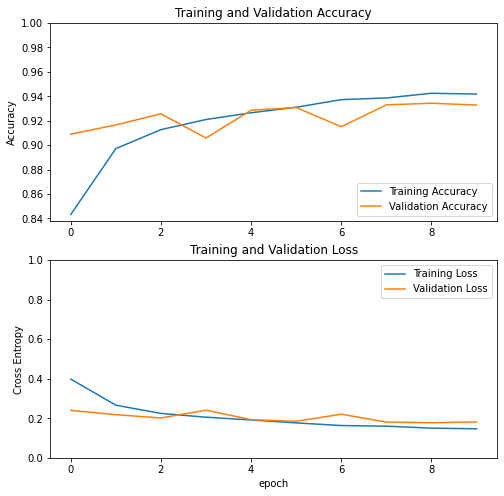

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Huy/covid19/checkpoint/checkpoint')

OSError: ignored